[View in Colaboratory](https://colab.research.google.com/github/vincentei/Python_aux/blob/master/python_examples.ipynb)

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import datetime as dt
import pytz
import time
import os
import sys
import dateutil.parser

In [0]:
import sys
if sys.version_info[0] < 3: 
    from StringIO import StringIO
else:
    from io import StringIO

## Numpy

In [17]:
# creating numpy arrays with dimension (3,2) and (2,4) , (n,m) * (m,k)
A = np.array([[1,2], [3,4],[5,6]])
B = np.array([[1,2,3,4], [5,6,7,8]])
print (A.shape)
print (B.shape)

(3, 2)
(2, 4)


In [18]:
# calc multiply two matrices, dot product between two matrices
C = np.matmul(A,B)
print (C.shape)

(3, 4)


In [19]:
# create numpy array with range from 1 to 10, then reshape into (2,5) matrix
a = np.arange(1,11)
print (a)
A = a.reshape(2,5)
print (A)

[ 1  2  3  4  5  6  7  8  9 10]
[[ 1  2  3  4  5]
 [ 6  7  8  9 10]]


In [0]:
# now create (2,3) random numpy with same seed
np.random.seed(42)
A = np.random.randn(3,10)

In [21]:
# concatenate two arrays
a = np.array([1,2,3])
b = np.array([4,5,6])
print(np.concatenate([a,b]))

[1 2 3 4 5 6]


In [22]:
# concatenate two matrices
a = np.array([[1,2,3],[3,4,3]])
b = np.array([[1,2,3],[3,4,3]])
c = np.concatenate([a,b])
d = np.concatenate([a,b],axis=1)
print(c.shape)
print(d.shape)

(4, 3)
(2, 6)


In [23]:
# sum two arrays
a = np.array([1,2,3])
b = np.array([4,5,6])
print(a + b)

[5 7 9]


In [24]:
# clipping (ie squash value of numpy array between min, max)
a = np.arange(6)
print (a)
print (np.clip(a,2,4))

[0 1 2 3 4 5]
[2 2 2 3 4 4]


In [25]:
# sample idx from distribution
h = np.array([0.1, 0.2, 0.5,0.2])
#index = np.random.choice([0, 1, 2, 3], p = h.ravel())
#print(index)
index2 = np.random.choice(np.arange(len(h)), p = h.ravel())
print(index2)

2


In [26]:
# give index of max value in numpy array
a = np.array([1,33,4,5])
print(np.argmax(a))

1


In [27]:
# give index of max value in 2d numpy array
a = np.array([[1,33,4,5],[1,2,3,44]])
print(np.argmax(a))
print(np.argmax(a,axis=0))
print(np.argmax(a,axis=1))
print(np.argmax(a,axis=-1)) #-1 impies the last axis

7
[0 0 0 1]
[1 3]
[1 3]


In [28]:
# stepping
a = np.arange(1,1000)
b = a[0:168:24]
print(b)

[  1  25  49  73  97 121 145]


In [29]:
168 // 24 + 1

8

### Reshape

In [30]:
# (n,) to (n,1)
a = np.array([1,2,3])
print (a.shape)
a = a[:,None]
print(a.shape)

(3,)
(3, 1)


In [31]:
# reshape 6 into 3*2*1
a = np.asarray([1,52,6,5,9,6])
print(a.shape)
b = a.reshape(3,2,1)
print(b)
print(b.shape)

(6,)
[[[ 1]
  [52]]

 [[ 6]
  [ 5]]

 [[ 9]
  [ 6]]]
(3, 2, 1)


In [32]:
a = np.asarray([1,55,88,66])
print(a.shape)
b = a.reshape(-1,1)
print(b.shape)

(4,)
(4, 1)


### Make input for LSTM

In [33]:
a = np.arange(1,11)
a

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [0]:
look_back = 4
data = []
for i in range(0,len(a)-look_back-1,2):
  data.append(a[i:i+look_back])  

In [35]:
data

[array([1, 2, 3, 4]), array([3, 4, 5, 6]), array([5, 6, 7, 8])]

### Arrange

In [36]:
# arrange let's you make a vector
# np.arrange(start, stop, step)
a = np.arange(1,19,3)
a

array([ 1,  4,  7, 10, 13, 16])

### Linspace

In [37]:
#  give me 4 number equally spaced on interval [2.5,10]
a = np.linspace(2.5,10,num=4)
a

array([ 2.5,  5. ,  7.5, 10. ])

### Add column to numpy matrix

In [38]:
a = np.arange(0,6,1).reshape(3,2)
print(a.shape)
a

(3, 2)


array([[0, 1],
       [2, 3],
       [4, 5]])

In [39]:
# use np.append or np.hstack
b = np.asarray([1,2,3]).reshape(-1,1)
print(b.shape)
c = np.hstack((a,b))
d = np.append(a,b,axis=1)
print(c.shape)
print(d.shape)

(3, 1)
(3, 3)
(3, 3)


### Square of numpy

In [40]:
a = np.arange(0,6,1).reshape(3,2)
c = np.square(a)
c

array([[ 0,  1],
       [ 4,  9],
       [16, 25]])

## Strings

In [41]:
# remove all rows in col in df that has certain string
df = pd.DataFrame({'Product':['H01','H02','H03'],'Price':[22,33,44]})
idx = df['Product'].str.contains('02')
df = df.loc[~idx]
df.head()

,Price,Product
0,22,H01
2,44,H03


In [42]:
# remove from string
s1 = 'appelmoes'
s2 = s1[:4] + s1[5:]
print(s2)

appemoes


## List

In [0]:
# sub set that is not in other list
a = ['hoi','appel','banaan','kikker']
b = ['appel','banaan']

In [44]:
main_list = list(set(a) - set(b))
main_list

['kikker', 'hoi']

### List comprehension

In [45]:
# one line list comprehension
# https://towardsdatascience.com/python-for-data-science-8-concepts-you-may-have-forgotten-i-did-825966908393
a = [1,2,3,4]
b = [i**2 for i in a]
b

[1, 4, 9, 16]

In [46]:
# one line list comprehension with if statement
a = [1,2,3,4]
b = [i**2 for i in a if i < 4]
b

[1, 4, 9]

## Dictionary

In [0]:
# create dict
mydict = {'ali':178,'johan':'188','Doei':'48'}

In [48]:
# how many element are in my dict?
len(mydict)

3

## Plotting

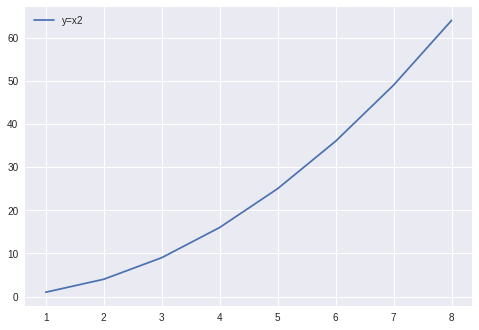

In [49]:
# make plot of two numpy arrays
x = np.array([1,2,3,4,5,6,7,8])
y = np.array([1,4,9,16,25,36,49,64])
plt.plot(x,y,label = 'y=x2')
plt.legend()
plt.show()

## Other stuff

In [50]:
# the modulo operator, the remainder from division
2 % 300

2

In [0]:
TESTDATA = StringIO("""col1;col2;col3
    1;4.4;99
    2;4.5;200
    3;4.7;65
    4;3.2;140
    """)

df = pd.read_csv(TESTDATA, sep=";")

In [52]:
print (sys.version)

2.7.14 (default, Sep 23 2017, 22:06:14) 
[GCC 7.2.0]


## Dataframe

In [0]:
# Create dataframe
df = pd.DataFrame({'a':[1,2,3],'b':[3,4,5]})

In [54]:
# dataframe from numpy array
names = ['apple','orange','apple','banana']
price = [1,2,5,10]
df = pd.DataFrame({'names':names,'price':price})
df.head()

,names,price
0,apple,1
1,orange,2
2,apple,5
3,banana,10


In [55]:
# make new column price_sqr using the apply function
df['price_sqr'] = df['price'].apply(lambda x: x*x)
df.head()

,names,price,price_sqr
0,apple,1,1
1,orange,2,4
2,apple,5,25
3,banana,10,100


In [56]:
# add 10 to price of apple
idx = df['names'] == 'apple'
df.loc[idx,'price'] = df.loc[idx,'price'] + 10
df.head()

,names,price,price_sqr
0,apple,11,1
1,orange,2,4
2,apple,15,25
3,banana,10,100


In [57]:
# rename column
df.rename(columns = {'names':'name'},inplace=True)
df.head()

,name,price,price_sqr
0,apple,11,1
1,orange,2,4
2,apple,15,25
3,banana,10,100


In [58]:
# sort by name
df =df.sort_values(by=['name','price'])
df.tail(10)

,name,price,price_sqr
0,apple,11,1
2,apple,15,25
3,banana,10,100
1,orange,2,4


### Multiple dataframes

In [59]:
# concatenate multiple df's into one
df1 = pd.DataFrame({'a':[1,2,3],'b':[3,4,5]})
df2 = pd.DataFrame({'a':[10,20,30],'b':[30,40,50]})

df_all =[]

df_all.append(df1)
df_all.append(df2)

df_all = pd.concat(df_all)
df_all.head()

,a,b
0,1,3
1,2,4
2,3,5
0,10,30
1,20,40


In [60]:
# reset the index, do not insert the index as a column into the df
df_all.reset_index(inplace=True,drop=True)
df_all.head()

,a,b
0,1,3
1,2,4
2,3,5
3,10,30
4,20,40


### Groupby

In [61]:
# dataframe from numpy array
name = ['apple','orange','apple','banana','banana']
price = [1,2,5,10,20]
weight = [6,7,10,15,25]
df = pd.DataFrame({'name':name,'price':price,'weight':weight})
df.head()

,name,price,weight
0,apple,1,6
1,orange,2,7
2,apple,5,10
3,banana,10,15
4,banana,20,25


In [62]:
# group by fruit and calc the average price, 
df_grp = df.groupby(['name'])['price'].mean() # this will return a pandas series 
print(df_grp)
print(type(df_grp))

name
apple      3
banana    15
orange     2
Name: price, dtype: int64
<class 'pandas.core.series.Series'>


In [63]:
# groupby fruit and calc the average price
df_grp = df.groupby(['name'])[['price','weight']].mean() # will return a df with index equal to the group
print(df_grp)
print(type(df_grp))

        price  weight
name                 
apple       3       8
banana     15      20
orange      2       7
<class 'pandas.core.frame.DataFrame'>


In [64]:
# groupby fruit but make a new index
df_grp = df.groupby(['name'],as_index=False)[['price','weight']].mean() # will return a df with index equal to the group
print(df_grp)
print(type(df_grp))

     name  price  weight
0   apple      3       8
1  banana     15      20
2  orange      2       7
<class 'pandas.core.frame.DataFrame'>


In [65]:
# groupby fruit
# for count also consider 'size'. size will return n for NaN values also, whereas 'count' will not.
# https://gist.github.com/conormm/fd8b1980c28dd21cfaf6975c86c74d07
df.groupby(['name'])['price','weight'].agg(['mean', 'sum', 'count']) 

price           weight          
        mean sum count   mean sum count
name                                   
apple      3   6     2      8  16     2
banana    15  30     2     20  40     2
orange     2   2     1      7   7     1

In [0]:
# now let's make a used defined function to groupby
# Volume Weighted Average Price
def vwap(x):
    return (x['weight'] * x['price']).sum() / x['weight'].sum()

In [67]:
# calc the volume weighted price
df_group = pd.DataFrame(df.groupby(['name']).apply(lambda x: vwap(x)))
df_group.head()

,0
name,
apple,3
banana,16
orange,2


In [68]:
# the column is messed up so correct this
df_group.rename(columns={ df_group.columns[0]: "vwap" }, inplace = True)
df_group.head()

,vwap
name,
apple,3
banana,16
orange,2


In [69]:
# you can also use the describe function on the group
# reference https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/
df.groupby(['name'])['price'].describe()

,count,mean,std,min,25%,50%,75%,max
name,,,,,,,,
apple,2.0,3.0,2.828427,1.0,2.0,3.0,4.0,5.0
banana,2.0,15.0,7.071068,10.0,12.5,15.0,17.5,20.0
orange,1.0,2.0,NaN,2.0,2.0,2.0,2.0,2.0


### Indices

In [70]:
# check whether elements of pandas series are in list
df = pd.DataFrame({'name':['Apple','Banana','Citrus','Apple']})
idx = df['name'].isin(['Apple','Banana'])
print(idx)

0     True
1     True
2    False
3     True
Name: name, dtype: bool


### Duplicates

In [71]:
# drop duplicates in a df
df = pd.DataFrame({'name':['Apple','Banana','Citrus','Apple']})
df.drop_duplicates(subset=['name'],inplace=True)
df.head()

,name
0,Apple
1,Banana
2,Citrus


### Long to wide

In [72]:
df = pd.DataFrame({'Country':['France','France','Germany','Germany'],'Id':['volume','price','volume','price'],'Value':[3000,42,2500,35]})
df.head()

,Country,Id,Value
0,France,volume,3000
1,France,price,42
2,Germany,volume,2500
3,Germany,price,35


In [73]:
# convert to wide format
df_wide = df.pivot(index='Country',columns='Id',values = 'Value')
df_wide.head()

Id,price,volume
Country,,
France,42,3000
Germany,35,2500


In [74]:
# if you have multiple index you can use pivot_table
df = pd.DataFrame({'Country':['France','France','Germany','Germany'],'forecast':['Mon','Mon','Mon','Mon'],'delivery':['Tue','Wed','Tue','Wed'],'Value':[3000,42,2500,35]})
df.head()

,Country,Value,delivery,forecast
0,France,3000,Tue,Mon
1,France,42,Wed,Mon
2,Germany,2500,Tue,Mon
3,Germany,35,Wed,Mon


In [75]:
df_wide = pd.pivot_table(df, values = 'Value', index=['forecast','delivery'], columns = 'Country')
df_wide.head()

Country            France  Germany
forecast delivery                 
Mon      Tue         3000     2500
         Wed           42       35

In [76]:
df_wide.reset_index(inplace=True)
df_wide.head()

Country,forecast,delivery,France,Germany
0,Mon,Tue,3000,2500
1,Mon,Wed,42,35


### Slice from a dataframe

In [0]:
df = pd.DataFrame({'wind':[100,150,250],'solar':[50,55,60]})
idx = df['wind'] == 150
df_slice = df.loc[~idx] # creates an implicit copy will get warning

In [78]:
# set a new value to original df
"""
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing
"""
# see https://github.com/abgoswam/2016/blob/master/062016/python/pandas_views_copy.py

df.loc[2,'wind'] = 999
print(df)
print("")
print(df_slice)
print("")
df_slice.loc[2,'wind'] = -1
print(df_slice)

   solar  wind
0     50   100
1     55   150
2     60   999

   solar  wind
0     50   100
2     60   250

   solar  wind
0     50   100
2     60    -1


/usr/local/lib/python2.7/dist-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


In [79]:
df = pd.DataFrame({'wind':[100,150,250],'solar':[50,55,60]})
idx = df['wind'] == 150
df_slice = df.loc[~idx].copy() # creates an explicit copy no warning
print(df)
print("")
print(df_slice)
print("")
df_slice.loc[2,'wind'] = -1
print(df_slice)

   solar  wind
0     50   100
1     55   150
2     60   250

   solar  wind
0     50   100
2     60   250

   solar  wind
0     50   100
2     60    -1


### Merge

In [80]:
df1 = pd.DataFrame({'name':['appel','banana','orange'],'weight':[10,20,30]}) 
df2 = pd.DataFrame({'name':['appel','banana'],'price':[1,5]})
df_merge = df1.merge(df2,how='left',left_on =['name'],right_on = ['name'])
df_merge.head()

,name,weight,price
0,appel,10,1.0
1,banana,20,5.0
2,orange,30,NaN


### Check NA's

In [81]:
df_merge[df_merge.isnull().any(axis=1)]

,name,weight,price
2,orange,30,NaN


### Remove row with any zero

In [82]:
df = pd.DataFrame({'name':['appel','banana','orange'],'weight':[10,20,0],'cost':[0,11,0]})
df

,cost,name,weight
0,0,appel,10
1,11,banana,20
2,0,orange,0


In [83]:
# get idx of row with zero
cols = ['cost','weight']
idx = (df[cols] == 0).any(axis=1)
print(idx)

0     True
1    False
2     True
dtype: bool


In [84]:
df2 = df.loc[~idx]
df2.reset_index(inplace=True,drop=True)
df2.head()

,cost,name,weight
0,11,banana,20


### Get index of column name

In [85]:
df = pd.DataFrame({'name':['apple','banaan','peer'],'weight':[10,19,33]})

df.columns

Index([u'name', u'weight'], dtype='object')

In [86]:
df.columns.get_loc('weight')

1

### Get index of value

In [87]:
a = np.array([1,2,3])
#np.where(a == 3)
np.argwhere(a==3)[0][0]

2

## Apply and Map

In [88]:
# make new column using the map function
# http://book.pythontips.com/en/latest/map_filter.html
df = pd.DataFrame({'name':['apple','banaan','peer'],'price':[10,19,33]})
df['price_sqr_map'] = list(map(lambda x: x**2, df['price']))
df.head()

,name,price,price_sqr_map
0,apple,10,100
1,banaan,19,361
2,peer,33,1089


In [90]:
# make new column using the map function, add price + price_sqr
# http://pythonfiddle.com/map-with-multiple-arguments/
df['price_sqr_map2'] = list(map(lambda x,y: x+y, df['price'],df['price_sqr_map']))
df.head()

,name,price,price_sqr_map,price_sqr_map2
0,apple,10,100,110
1,banaan,19,361,380
2,peer,33,1089,1122


## Dates

### General

In [91]:
# create datetime object
a = dt.datetime(2018,5,9,0,0) # constructor, a datetime object a is created 
b = dt.datetime.today() # constructor
c = dt.date(2018,10,28)
print(a)
print (b)
print(c)

2018-05-09 00:00:00
2018-06-30 21:10:30.303520
2018-10-28


In [92]:
# the object has several attributes
print (a.year)
print (a.month)
print(a.date())
print(a.isoweekday())

2018
5
2018-05-09
3


In [93]:
# Conversely, the datetime.strptime() class method creates a datetime object from a string representing a date and time and a corresponding format string
a = dt.datetime.strptime('2018-05-09',"%Y-%m-%d")
print(a)

2018-05-09 00:00:00


In [94]:
# convert to string with format
print(a.strftime("%Y-%m-%d"))
print(a.strftime("%Y%m%d"))
print(type(a.strftime("%Y%m%d")))

2018-05-09
20180509
<type 'str'>


In [95]:
# make dataframe with only index

startdate=dt.datetime(2018,1,1,0,0)
enddate=dt.datetime(2018,12,31,23,59)

delivery_date = pd.date_range(startdate,enddate,freq='1H',tz='Europe/Amsterdam')
df = pd.DataFrame(index = delivery_date) 
df.reset_index(inplace=True)
df.rename(columns={'index':'delivery_date'},inplace=True)
print(df.tail(2))

                 delivery_date
8758 2018-12-31 22:00:00+01:00
8759 2018-12-31 23:00:00+01:00


In [96]:
# convert datetime to date
df['date'] = df['delivery_date'].apply(lambda x: x.date())
print(df.tail(2))

                 delivery_date        date
8758 2018-12-31 22:00:00+01:00  2018-12-31
8759 2018-12-31 23:00:00+01:00  2018-12-31


In [97]:
# convert to utc
df.index = df['delivery_date'] 
df.index = df.index.tz_convert('UTC') # tz_convert only works on index, as index is unique
df['delivery_date_utc'] = df.index
df.tail(2)

,delivery_date,date,delivery_date_utc
delivery_date,,,
2018-12-31 21:00:00+00:00,2018-12-31 22:00:00+01:00,2018-12-31,2018-12-31 21:00:00+00:00
2018-12-31 22:00:00+00:00,2018-12-31 23:00:00+01:00,2018-12-31,2018-12-31 22:00:00+00:00


In [98]:
# Also the series can be localized
df = pd.DataFrame({'ForecastDate':['2018-10-28 01:00:00','2018-10-28 02:00:00','2018-10-28 02:00:00','2018-10-28 03:00:00']})
df['ForecastDate_local'] = pd.to_datetime(df['ForecastDate'],format='%Y-%m-%d %H:%M:%S')
df.head()

,ForecastDate,ForecastDate_local
0,2018-10-28 01:00:00,2018-10-28 01:00:00
1,2018-10-28 02:00:00,2018-10-28 02:00:00
2,2018-10-28 02:00:00,2018-10-28 02:00:00
3,2018-10-28 03:00:00,2018-10-28 03:00:00


In [99]:
# series still time zone naive so make it time zone aware
df['ForecastDate_local2'] = df['ForecastDate_local'].dt.tz_localize('Europe/Amsterdam',ambiguous='infer')
df.head()

,ForecastDate,ForecastDate_local,ForecastDate_local2
0,2018-10-28 01:00:00,2018-10-28 01:00:00,2018-10-28 01:00:00+02:00
1,2018-10-28 02:00:00,2018-10-28 02:00:00,2018-10-28 02:00:00+02:00
2,2018-10-28 02:00:00,2018-10-28 02:00:00,2018-10-28 02:00:00+01:00
3,2018-10-28 03:00:00,2018-10-28 03:00:00,2018-10-28 03:00:00+01:00


In [100]:
# Also dt has other function
# see https://pandas.pydata.org/pandas-docs/stable/api.html#datetimelike-properties
df['date'] = df['ForecastDate_local2'].dt.date
df.head()

,ForecastDate,ForecastDate_local,ForecastDate_local2,date
0,2018-10-28 01:00:00,2018-10-28 01:00:00,2018-10-28 01:00:00+02:00,2018-10-28
1,2018-10-28 02:00:00,2018-10-28 02:00:00,2018-10-28 02:00:00+02:00,2018-10-28
2,2018-10-28 02:00:00,2018-10-28 02:00:00,2018-10-28 02:00:00+01:00,2018-10-28
3,2018-10-28 03:00:00,2018-10-28 03:00:00,2018-10-28 03:00:00+01:00,2018-10-28


In [101]:
idx = df['date']==dt.date(2018,10,28)
df[idx].head(5)

,ForecastDate,ForecastDate_local,ForecastDate_local2,date
0,2018-10-28 01:00:00,2018-10-28 01:00:00,2018-10-28 01:00:00+02:00,2018-10-28
1,2018-10-28 02:00:00,2018-10-28 02:00:00,2018-10-28 02:00:00+02:00,2018-10-28
2,2018-10-28 02:00:00,2018-10-28 02:00:00,2018-10-28 02:00:00+01:00,2018-10-28
3,2018-10-28 03:00:00,2018-10-28 03:00:00,2018-10-28 03:00:00+01:00,2018-10-28


In [102]:
# now make a timezone aware
a = dt.datetime(2018,5,9,0,0) # constructor, a datetime object a is created 
tzinfo = pytz.timezone('Europe/Amsterdam')
b = tzinfo.localize(a)
print (b)

2018-05-09 00:00:00+02:00


In [103]:
# convert c to utc
utc = pytz.timezone('UTC')
c = b.astimezone(utc)
print(c)

2018-05-08 22:00:00+00:00


In [104]:
print (dt.datetime.today())

2018-06-30 21:10:41.034045


In [105]:
# make mapping between CEST and UTC
startdate=dt.datetime(2018,1,1,0,0)
enddate=dt.datetime(2050,1,1,0,0)

delivery_date = pd.date_range(startdate,enddate,freq='1H',tz='Europe/Amsterdam')
df = pd.DataFrame(index = delivery_date) 
df.reset_index(inplace=True)
df.rename(columns={'index':'date_local'},inplace=True)

df['date_utc'] = df['date_local'].dt.tz_convert('UTC')
df.tail(2)

,date_local,date_utc
280511,2049-12-31 23:00:00+01:00,2049-12-31 22:00:00+00:00
280512,2050-01-01 00:00:00+01:00,2049-12-31 23:00:00+00:00


In [106]:
# change the format
df['date_local2'] = df['date_local'].apply(lambda x: x.strftime("%d-%m-%Y %H:%M"))
df['date_utc2'] = df['date_utc'].apply(lambda x: x.strftime("%d-%m-%Y %H:%M"))
df.head(2)

,date_local,date_utc,date_local2,date_utc2
0,2018-01-01 00:00:00+01:00,2017-12-31 23:00:00+00:00,01-01-2018 00:00,31-12-2017 23:00
1,2018-01-01 01:00:00+01:00,2018-01-01 00:00:00+00:00,01-01-2018 01:00,01-01-2018 00:00


### Example Tennet data

In [107]:
date_start = dt.date(2017,1,1).strftime("%d-%m-%Y")
date_end = dt.date(2017,12,31).strftime("%d-%m-%Y")
tennet_url = "http://www.tennet.org/bedrijfsvoering/ExporteerData.aspx?exporttype=verrekenprijzen&format=csv&datefrom={}&dateto={}&submit=1".format(date_start, date_end)

cols = ['datum', 'PTE', 'periode_van','periode_tm','Afnemen','invoeden']

df_prices = pd.read_csv(tennet_url,usecols=cols,decimal=',')
df_prices.head(3)

,datum,PTE,periode_van,periode_tm,Afnemen,invoeden
0,01-01-2017,1,00:00,00:15,250.00,-200.00
1,01-01-2017,2,00:15,00:30,250.00,250.00
2,01-01-2017,3,00:30,00:45,33.56,33.56


In [108]:
col2drop = ['periode_tm']
df_prices.drop(col2drop,axis=1,inplace=True)
df_prices.head(3)

,datum,PTE,periode_van,Afnemen,invoeden
0,01-01-2017,1,00:00,250.00,-200.00
1,01-01-2017,2,00:15,250.00,250.00
2,01-01-2017,3,00:30,33.56,33.56


In [109]:
# convert datetime to utc
amsterdam = pytz.timezone('Europe/Amsterdam')
df_prices.index = pd.to_datetime(df_prices['datum'] + " " + df_prices['periode_van'],format='%d-%m-%Y %H:%M')
df_prices.index = df_prices.index.tz_localize(amsterdam, ambiguous='infer')

# save local date in column so the index can be converted
df_prices['datetime_local'] = df_prices.index
df_prices.index = df_prices.index.tz_convert('UTC')
df_prices.head(3)

,datum,PTE,periode_van,Afnemen,invoeden,datetime_local
2016-12-31 23:00:00+00:00,01-01-2017,1,00:00,250.00,-200.00,2017-01-01 00:00:00+01:00
2016-12-31 23:15:00+00:00,01-01-2017,2,00:15,250.00,250.00,2017-01-01 00:15:00+01:00
2016-12-31 23:30:00+00:00,01-01-2017,3,00:30,33.56,33.56,2017-01-01 00:30:00+01:00


In [110]:
# round/truncate datetime by replacing the minute by zero
t0 = time.time()

df_prices['datetime_local_trunc'] = df_prices['datetime_local'].apply(lambda x: x.replace(minute=0))

t1 = time.time()

print(t1-t0)

df_prices.head(3)

0.628046035767


,datum,PTE,periode_van,Afnemen,invoeden,datetime_local,datetime_local_trunc
2016-12-31 23:00:00+00:00,01-01-2017,1,00:00,250.00,-200.00,2017-01-01 00:00:00+01:00,2017-01-01 00:00:00+01:00
2016-12-31 23:15:00+00:00,01-01-2017,2,00:15,250.00,250.00,2017-01-01 00:15:00+01:00,2017-01-01 00:00:00+01:00
2016-12-31 23:30:00+00:00,01-01-2017,3,00:30,33.56,33.56,2017-01-01 00:30:00+01:00,2017-01-01 00:00:00+01:00


In [111]:
# round/truncate datetime by replacing the minute by zero
t0 = time.time()

df_prices['datetime_local_trunc2'] = list(map(lambda x: x.replace(minute=0), df_prices['datetime_local']))

t1 = time.time()

print(t1-t0)

df_prices.head(3)

0.678803920746


,datum,PTE,periode_van,Afnemen,invoeden,datetime_local,datetime_local_trunc,datetime_local_trunc2
2016-12-31 23:00:00+00:00,01-01-2017,1,00:00,250.00,-200.00,2017-01-01 00:00:00+01:00,2017-01-01 00:00:00+01:00,2017-01-01 00:00:00+01:00
2016-12-31 23:15:00+00:00,01-01-2017,2,00:15,250.00,250.00,2017-01-01 00:15:00+01:00,2017-01-01 00:00:00+01:00,2017-01-01 00:00:00+01:00
2016-12-31 23:30:00+00:00,01-01-2017,3,00:30,33.56,33.56,2017-01-01 00:30:00+01:00,2017-01-01 00:00:00+01:00,2017-01-01 00:00:00+01:00


### Parsing iso format

In [112]:
# parsing iso format
# http://cheat.readthedocs.io/en/latest/python/timezones.html
# https://stackoverflow.com/questions/12281975/convert-timestamps-with-offset-to-datetime-obj-using-strptime?noredirect=1&lq=1
df = pd.DataFrame({'deliverydate':['2017-03-26 01:00:00+01:00', '2017-03-26 03:00:00+02:00', '2017-03-26 04:00:00+02:00']})
df.head()

,deliverydate
0,2017-03-26 01:00:00+01:00
1,2017-03-26 03:00:00+02:00
2,2017-03-26 04:00:00+02:00


In [113]:
#df['deliverydate2']=df['deliverydate'].apply(lambda x: dateutil.parser.parse(x))
df['deliverydate2']=df['deliverydate'].apply(lambda x: x[:16])
df.head()

,deliverydate,deliverydate2
0,2017-03-26 01:00:00+01:00,2017-03-26 01:00
1,2017-03-26 03:00:00+02:00,2017-03-26 03:00
2,2017-03-26 04:00:00+02:00,2017-03-26 04:00


In [114]:
amsterdam = pytz.timezone('Europe/Amsterdam')
df['deliverydate3'] = pd.to_datetime(df['deliverydate2'],format='%Y-%m-%d %H:%M')
df['deliverydate4'] = df['deliverydate3'].dt.tz_localize('Europe/Amsterdam',ambiguous='infer')
df.index = df['deliverydate4'].dt.tz_convert('UTC')
df.head()

,deliverydate,deliverydate2,deliverydate3,deliverydate4
deliverydate4,,,,
2017-03-26 00:00:00+00:00,2017-03-26 01:00:00+01:00,2017-03-26 01:00,2017-03-26 01:00:00,2017-03-26 01:00:00+01:00
2017-03-26 01:00:00+00:00,2017-03-26 03:00:00+02:00,2017-03-26 03:00,2017-03-26 03:00:00,2017-03-26 03:00:00+02:00
2017-03-26 02:00:00+00:00,2017-03-26 04:00:00+02:00,2017-03-26 04:00,2017-03-26 04:00:00,2017-03-26 04:00:00+02:00


In [115]:
df.dtypes

deliverydate                               object
deliverydate2                              object
deliverydate3                      datetime64[ns]
deliverydate4    datetime64[ns, Europe/Amsterdam]
dtype: object

## Feature engineering

In [116]:
# calc the diff and lag of a feature
df = pd.DataFrame({'wind':[100,120,150,100,50,0,1000,80,50,10],'solar':[100,120,150,100,50,0,1000,80,50,10]})

cols =  ['wind','solar']

for i in cols:
        col_name = 'diff1_' + i
        col_name2 = 'lag1_' + i
        df[col_name] = df[i].diff(1)
        df[col_name2] = df[i].shift(1)

df.head()

,solar,wind,diff1_wind,lag1_wind,diff1_solar,lag1_solar
0,100,100,NaN,NaN,NaN,NaN
1,120,120,20.0,100.0,20.0,100.0
2,150,150,30.0,120.0,30.0,120.0
3,100,100,-50.0,150.0,-50.0,150.0
4,50,50,-50.0,100.0,-50.0,100.0


In [117]:
# be carefull with removing any rows
idx = df['wind'] == 150
df = df.loc[~idx]
df.head()

,solar,wind,diff1_wind,lag1_wind,diff1_solar,lag1_solar
0,100,100,NaN,NaN,NaN,NaN
1,120,120,20.0,100.0,20.0,100.0
3,100,100,-50.0,150.0,-50.0,150.0
4,50,50,-50.0,100.0,-50.0,100.0
5,0,0,-50.0,50.0,-50.0,50.0


### Dummy variables

In [118]:
dates = pd.date_range(dt.datetime(2018,1,1,0,0), periods=168,freq='1H')
df = pd.DataFrame(index=dates)
df.reset_index(inplace=True)
df.rename(columns={'index':'datetime'},inplace=True)
df.head(2)

,datetime
0,2018-01-01 00:00:00
1,2018-01-01 01:00:00


In [119]:
df['weekday'] = df['datetime'].dt.weekday.astype('category')
#df['hour'] = df['datetime'].dt.hour.astype('category')
df_dummies = pd.get_dummies(df)
df_dummies.head()

,datetime,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,2018-01-01 00:00:00,1,0,0,0,0,0,0
1,2018-01-01 01:00:00,1,0,0,0,0,0,0
2,2018-01-01 02:00:00,1,0,0,0,0,0,0
3,2018-01-01 03:00:00,1,0,0,0,0,0,0
4,2018-01-01 04:00:00,1,0,0,0,0,0,0


In [120]:
# now hour and weekday at the same time
dates = pd.date_range(dt.datetime(2018,1,1,0,0), periods=168,freq='1H')
df = pd.DataFrame(index=dates)
df.reset_index(inplace=True)
df.rename(columns={'index':'datetime'},inplace=True)

df['weekday'] = df['datetime'].dt.weekday.astype('category')
df['hour'] = df['datetime'].dt.hour.astype('category')

df.head(2)

,datetime,weekday,hour
0,2018-01-01 00:00:00,0,0
1,2018-01-01 01:00:00,0,1


In [121]:
df = pd.get_dummies(df,prefix=['day','hour'],prefix_sep = '_',columns = ['weekday','hour'])
df.head(2)

,datetime,day_0,day_1,day_2,day_3,day_4,day_5,day_6,hour_0,hour_1,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,2018-01-01 00:00:00,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2018-01-01 01:00:00,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [122]:
df.columns

Index([u'datetime', u'day_0', u'day_1', u'day_2', u'day_3', u'day_4', u'day_5',
       u'day_6', u'hour_0', u'hour_1', u'hour_2', u'hour_3', u'hour_4',
       u'hour_5', u'hour_6', u'hour_7', u'hour_8', u'hour_9', u'hour_10',
       u'hour_11', u'hour_12', u'hour_13', u'hour_14', u'hour_15', u'hour_16',
       u'hour_17', u'hour_18', u'hour_19', u'hour_20', u'hour_21', u'hour_22',
       u'hour_23'],
      dtype='object')

# I/O

In [0]:
# list all files in the dir
#os.listdir('Map1/Map2/Map3')
#os.listdir(".")

In [0]:
# write df to csv
df = pd.DataFrame({'employee':['John','Willem','Fred'],'age':[33,27,88]})
#df_wide.to_csv('Input/' + 'spot_prices_utc.csv',index=True,)
#df_wide.to_csv('Input/' + 'spot_prices_utc.csv',index=True,index_label='ValueDate_utc')
df.to_csv('testColab.csv',index=False)

In [125]:
# read csv
df2 = pd.read_csv('testColab.csv')
df2.head()

,age,employee
0,33,John
1,27,Willem
2,88,Fred


In [126]:
# read csv but skip second row
cols = ['age']
df = pd.read_csv('testColab.csv',usecols=cols,skiprows=[1])
df.head()

,age
0,27
1,88
